In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
def processName(config):
    results_name = f"embed_dim{config['embed_dim']}"
    results_name += "_active" if config["active"] else "_passive"
    results_name += "_saving_task_num" if config["saving_task_num"] else "_not_saving_task_num"
    if config["active"]:
        results_name += "_target_aware" if config["target_aware"] else "_target_agnostic"
    results_name += f"_target_sample_num{config['num_target_sample']}"
    results_name += f"_seed{config['task_embed_matrix_seed']}"
    return results_name

## Error on the coarse estimation (not actual algo but just for explain)
In the first stage of our algorihtm, we will explore all $d_W$ directions and find the $k$ direction that best describe the effective subspace. According to our theory, the $\{v\}_{i=1}^k$ satisfies $\frac{1}{3} B_W B_W^\top \leq B_W (\sum_{i} v_iv_i^\top) B_W^\top \leq 3 B_W B_W^\top$. We verify this below:

- The upper line indicates $\lambda_{min}(3 B_W B_W^\top - B_W (\sum_{i} v_iv_i^\top) B_W^\top)$. So it should be positive and the larger the better.
- The upper line indicates $\lambda_{max}(\frac{1}{3} B_W B_W^\top - B_W (\sum_{i} v_iv_i^\top) B_W^\top)$. So it should be negative and the smaller the better.
- About $2/3$ x-axis is $d_X k^2 \kappa(B_W)$ (input_dim*(embed_dim)**2*condition_num_of_taskEmbedMatrix). The theory said it is the minmum number required to get a good coarse estimation of $B_X$ and therefore $B_W$. And our observation aligns with the theory.

In [45]:
config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": False,
    "target_aware": False,
    "saving_task_num": False,
    "exp_base": 1,
    "outer_epoch_num": 6,
    "base_len_ratio": 0.25
    }
results = {500: None, 43: None, 12434: None}
for seed in [43, 500, 12434]:
    config["task_embed_matrix_seed"] = seed
    filename = processName(config)
    tmp = pd.read_csv(f"results/{filename}.csv")
    tmp["task_embed_space_est_similarities_upper"] *= -1
    tmp["task_embed_space_est_similarities_lower"] *= -1
    if results[seed] is None:
        results[seed] = tmp
    else:
        results[seed] = pd.concat([results[seed], tmp])

<Axes: xlabel='budget', ylabel='task_embed_space_est_similarities_upper'>

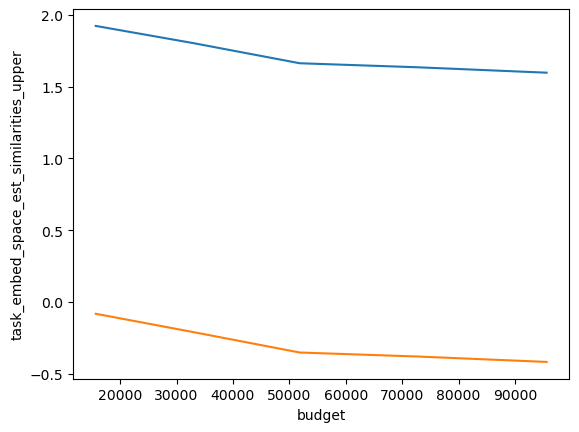

In [46]:
sns.lineplot(x="budget", y="task_embed_space_est_similarities_upper", data=results[500], markers=True, dashes=False)
sns.lineplot(x="budget", y="task_embed_space_est_similarities_lower", data=results[500],  markers=True, dashes=False)

<Axes: xlabel='budget', ylabel='task_embed_space_est_similarities_upper'>

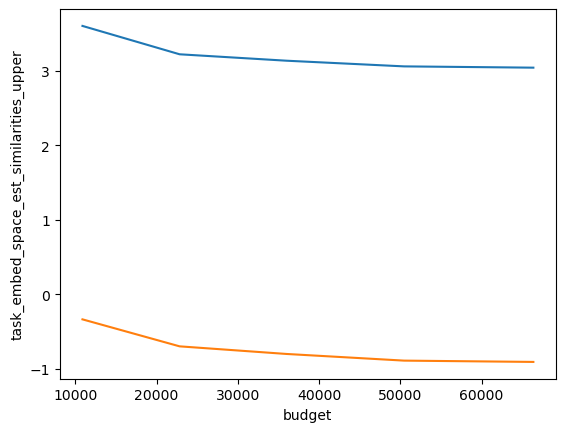

In [47]:
sns.lineplot(x="budget", y="task_embed_space_est_similarities_upper", data=results[43], markers=True, dashes=False)
sns.lineplot(x="budget", y="task_embed_space_est_similarities_lower", data=results[43],  markers=True, dashes=False)

<Axes: xlabel='budget', ylabel='task_embed_space_est_similarities_upper'>

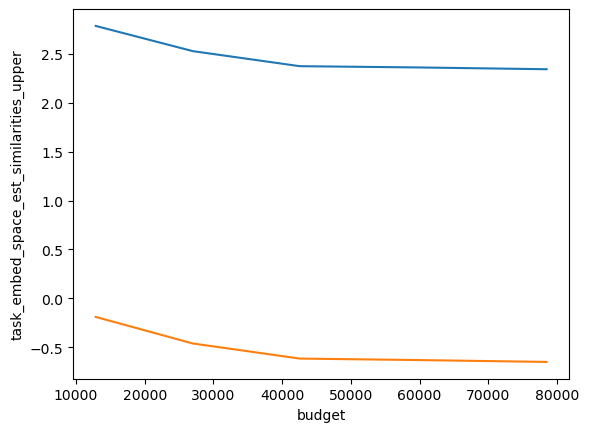

In [48]:
sns.lineplot(x="budget", y="task_embed_space_est_similarities_upper", data=results[12434], markers=True, dashes=False)
sns.lineplot(x="budget", y="task_embed_space_est_similarities_lower", data=results[12434],  markers=True, dashes=False)

## Embed_dim = 4 and task_embed_ratio = 20

### Read-in the saved results ...

In [66]:
config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": False,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

results = {500: None, 43: None, 12434: None}
for seed in [43, 500, 12434]:
    for active in [True, False]:
        for target_aware in [True, False]:
            if not active and target_aware: continue
            config["task_embed_matrix_seed"] = seed
            config["active"] = active
            config["target_aware"] = target_aware
            filename = processName(config)
            tmp = pd.read_csv(f"results/{filename}.csv")
            if active:
                tmp["mode"] = "AL_target_aware" if target_aware else "AL_target_agnostic"
            else:
                tmp["mode"] = "passive"
            if results[seed] is None:
                results[seed] = tmp
            else:
                results[seed] = pd.concat([results[seed], tmp])
            
        
config = {
    "task_embed_matrix_seed": 500,
    "embed_dim": 4,
    "task_embed_ratio": 20,
    "input_dim": 200,
    "num_target_sample": 8000,
    "active": None,
    "target_aware": None,
    "saving_task_num": True,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.5
    }

for seed in [500, 12434, 43]:
    for target_aware in [True, False]:
        for active in [True, False]:
            if not active and target_aware: continue
            config["task_embed_matrix_seed"] = seed
            config["active"] = active
            config["target_aware"] = target_aware
            filename = processName(config)
            tmp = pd.read_csv(f"results/{filename}.csv")
            if active:
                tmp["mode"] = "AL_target_aware_saving_task" if target_aware else "AL_target_agnostic_saving_task"
            else:
                tmp["mode"] = "passive_saving_task"
            results[seed] = pd.concat([results[seed], tmp])
            


In [67]:
results[500]

,budget,loss,related_source_est_similarities,input_embed_space_est_similarities,task_embed_space_est_similarities_upper,task_embed_space_est_similarities_lower,mode
0,15663.489821,0.052013,0.000000,0.385785,-1.823030,0.173118,AL_target_aware
1,32893.328624,0.005391,0.932795,0.858095,-1.731936,0.279275,AL_target_aware
2,51846.151307,0.001309,0.951387,0.922561,-1.720152,0.291978,AL_target_aware
3,72694.256258,0.000703,0.951264,0.951526,-1.720057,0.292362,AL_target_aware
4,95627.171705,0.000793,0.951248,0.965484,-1.718829,0.293479,AL_target_aware
0,15663.489821,0.043929,NaN,0.325434,-2.007919,0.005135,AL_target_agnostic
1,32893.328624,0.005796,NaN,0.908452,-1.758040,0.255806,AL_target_agnostic
2,51846.151307,0.001804,NaN,0.968941,-1.736162,0.277400,AL_target_agnostic
3,72694.256258,0.000865,NaN,0.979921,-1.737356,0.276291,AL_target_agnostic
4,95627.171705,0.000719,NaN,0.986517,-1.737933,0.275726,AL_target_agnostic


### Source sampling number vs Test loss (in log scale)
*In not task saving mode*:
- Target_awareness AL performs the best because it sample more on estimated most target related source.
- Target_agnostic AL, which only implemnet the coarse-exploration and fine-exploration, performs the second.
- Passive, which random sample from all d_W direction, performs worst.
    - I conjecture that this is not only from generalization perspective, but also more tasks makes it hard to optimize.
    
*In task saving mode*:
- The performance might become worse in the AL setting, which is expectable. But still preserve advantage compared to passive.
- It's effect on the target-awareness AL is unstable, sometimes help, somtime not. But I want to argue that here I set some manually threshold on the est_task_embed_matrix $\hat{B}_W$ change. Once we detect the change we will re-compute the find-exploration basis. I do it in some uncareful way, so it might be improved via a careful engineering.

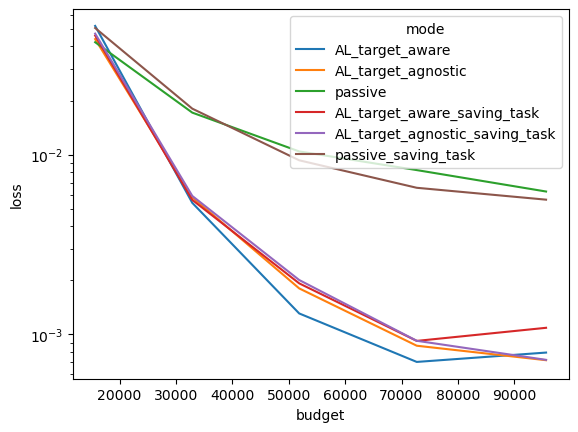

In [68]:
sns.lineplot(x="budget", y="loss", data=results[500], hue="mode", markers=True, dashes=False)
# plt.ylim([0, 0.01])
plt.yscale("log")

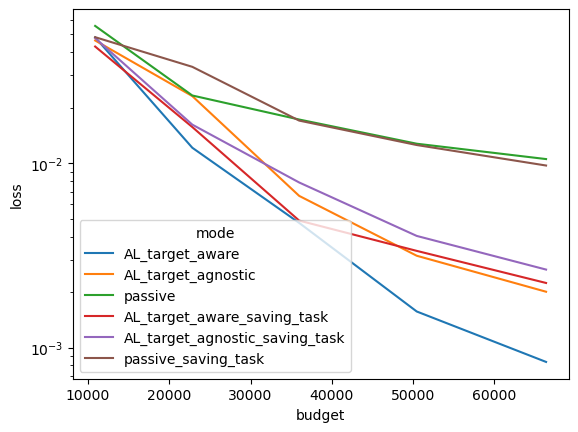

In [69]:
sns.lineplot(x="budget", y="loss", data=results[43], hue="mode", markers=True, dashes=False)
plt.yscale("log")

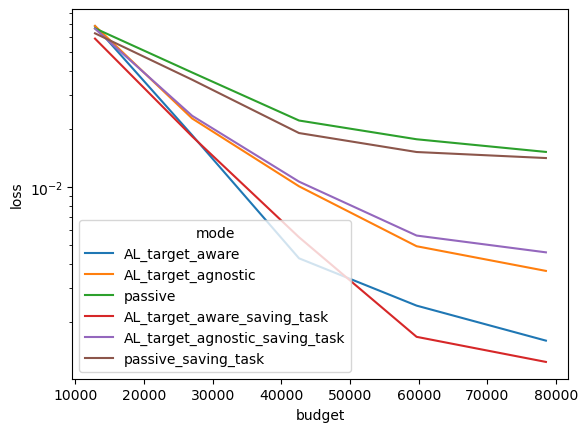

In [70]:
sns.lineplot(x="budget", y="loss", data=results[12434], hue="mode", markers=True, dashes=False)
plt.yscale("log")

### Source sampling number vs Input_embed_matrix ($B_X$) columns space estimation
- Target_agnostic AL, can perform similar or better then Target_aware AL, depends on the data structure.
    - This aligns with our design, because for target_agnostic, we hope it achieve a good estimation on all the directions. While for target-aware, we only care about the target related directions

<Axes: xlabel='budget', ylabel='input_embed_space_est_similarities'>

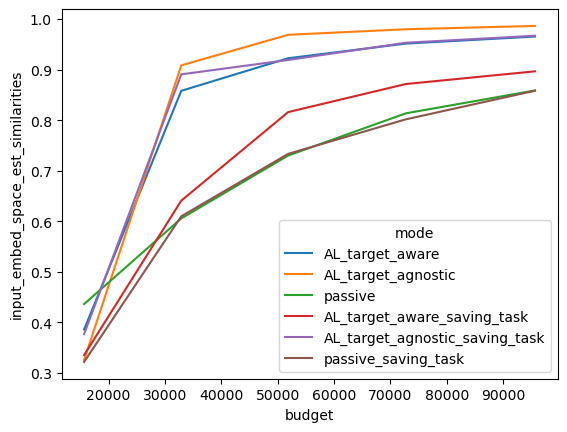

In [71]:
sns.lineplot(x="budget", y="input_embed_space_est_similarities", data=results[500], hue="mode", markers=True, dashes=False)
# plt.yscale("log")

<Axes: xlabel='budget', ylabel='input_embed_space_est_similarities'>

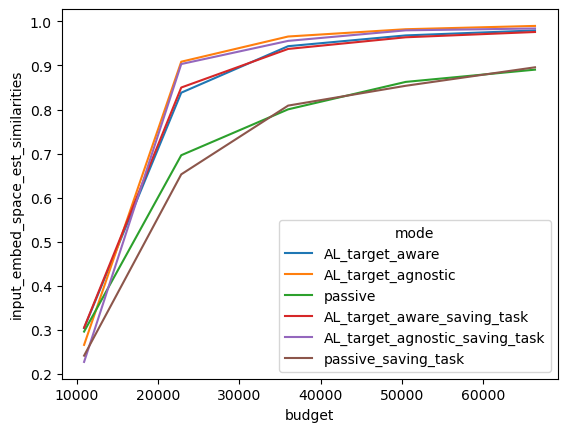

In [72]:
sns.lineplot(x="budget", y="input_embed_space_est_similarities", data=results[43], hue="mode", markers=True, dashes=False)
# plt.yscale("log")

<Axes: xlabel='budget', ylabel='input_embed_space_est_similarities'>

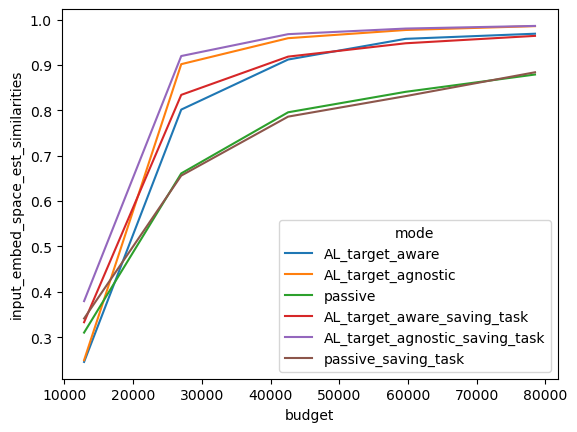

In [73]:
sns.lineplot(x="budget", y="input_embed_space_est_similarities", data=results[12434], hue="mode", markers=True, dashes=False)


### Source sampling number vs Most-target-related source estimation acc
- After every iteration of the fine-exploration stage, our source-related estimation is in general increasing.
    - You may above some variation, that is because the estimation is already very good. (See the last graph)
    - It gives explains why the target-aware AL can performs better, because it iteratively sample more on close-to-target source

(30000.0, 100000.0)

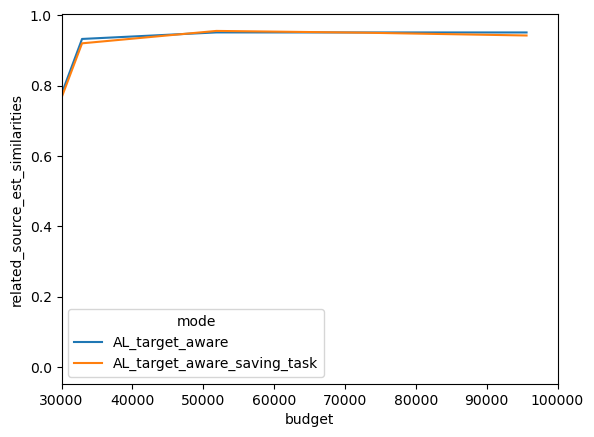

In [74]:
tmp = results[500].dropna()
sns.lineplot(x="budget", y="related_source_est_similarities", data=tmp, hue = "mode", markers=True, dashes=False)
# plt.yscale("log")
# plt.ylim([0.8, 1])
plt.xlim([30000, 100000])

(20000.0, 100000.0)

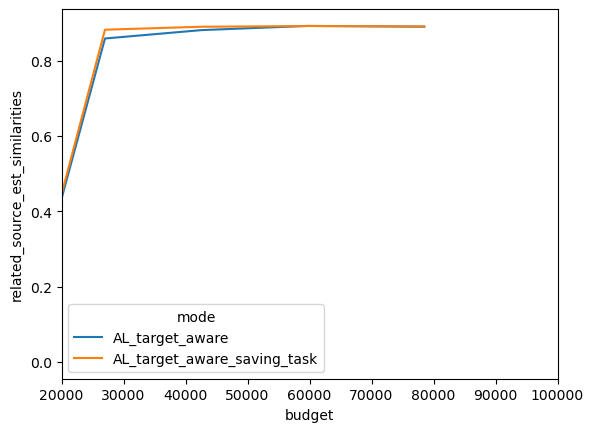

In [75]:
tmp = results[12434].dropna()
sns.lineplot(x="budget", y="related_source_est_similarities", data=tmp, hue = "mode", markers=True, dashes=False)
# plt.yscale("log")
# plt.ylim([0.8, 1])
plt.xlim([20000, 100000])


(20000.0, 100000.0)

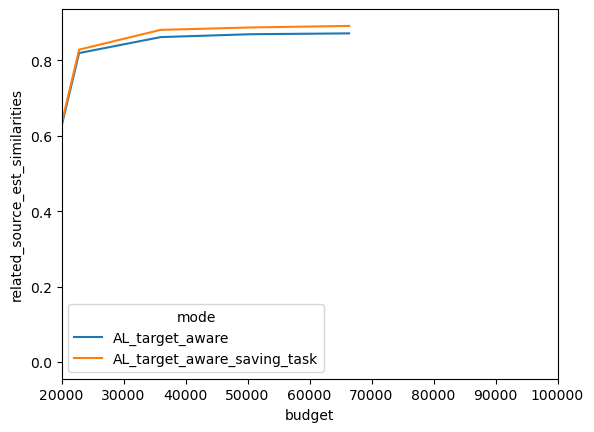

In [76]:
tmp = results[43].dropna()
sns.lineplot(x="budget", y="related_source_est_similarities", data=tmp, hue = "mode", markers=True, dashes=False)
# plt.yscale("log")
# plt.ylim([0.8, 1])
plt.xlim([20000, 100000])

## Embed_dim = 8 and task_embed_ratio = 10 (No task saving results)

- Here we increase the target number because input_dim/embed_dim is decreasing
- We should expect a more *obvious* gap between target agnostic and target aware with larger embed_dim

### Read-in the saved results ...

In [21]:
config = {
    "task_embed_matrix_seed": None,
    "embed_dim": 8,
    "task_embed_ratio": 10,
    "input_dim": 100,
    "num_target_sample": 12000,
    "active": None,
    "target_aware": None,
    "saving_task_num": False,
    "exp_base": 1.1,
    "outer_epoch_num": 5,
    "base_len_ratio": 0.2
    }

results = {500: None, 43: None, 12434: None}
for seed in [43, 500, 12434]:
    for active in [True, False]:
        for target_aware in [True, False]:
            if not active and target_aware: continue
            config["task_embed_matrix_seed"] = seed
            config["active"] = active
            config["target_aware"] = target_aware
            filename = processName(config)
            tmp = pd.read_csv(f"results/{filename}.csv")
            if active:
                tmp["mode"] = "AL_target_aware" if target_aware else "AL_target_agnostic"
            else:
                tmp["mode"] = "passive"
            if results[seed] is None:
                results[seed] = tmp
            else:
                results[seed] = pd.concat([results[seed], tmp])
            

### Source sampling number vs Test loss (in log scale)
- Similar behavior as before

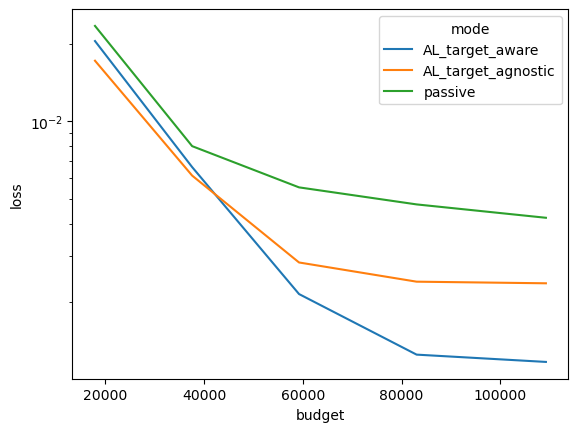

In [41]:
sns.lineplot(x="budget", y="loss", data=results[500], hue="mode", markers=True, dashes=False)
# plt.ylim([0, 0.01])
plt.yscale("log")

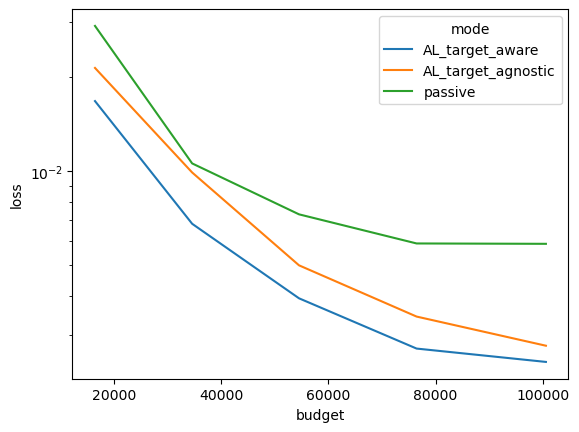

In [11]:
sns.lineplot(x="budget", y="loss", data=results[43], hue="mode", markers=True, dashes=False)
# plt.ylim([0, 0.01])
plt.yscale("log")

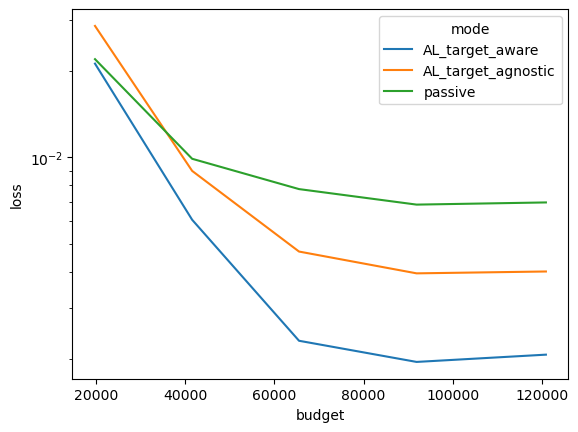

In [33]:
sns.lineplot(x="budget", y="loss", data=results[12434], hue="mode", markers=True, dashes=False)
# plt.ylim([0, 0.01])
plt.yscale("log")

### Source sampling number vs Input_embed_matrix ($B_X$) columns space estimation
- similar as before

<Axes: xlabel='budget', ylabel='input_embed_space_est_similarities'>

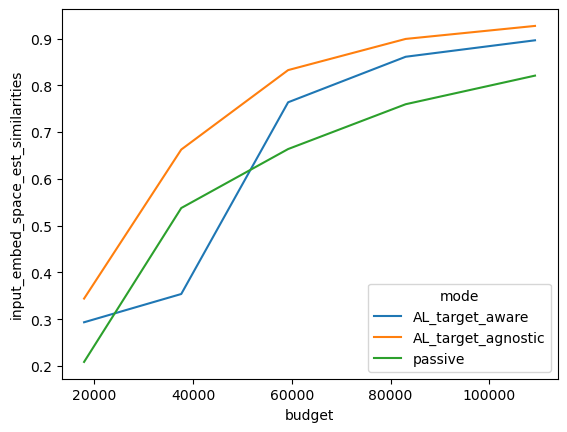

In [31]:
sns.lineplot(x="budget", y="input_embed_space_est_similarities", data=results[500], hue="mode", markers=True, dashes=False)
# plt.yscale("log")

<Axes: xlabel='budget', ylabel='input_embed_space_est_similarities'>

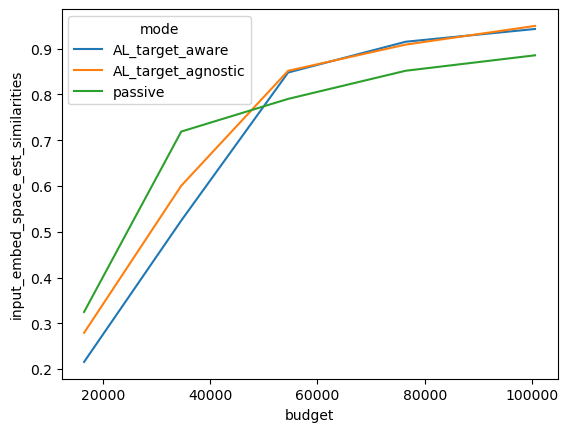

In [9]:
sns.lineplot(x="budget", y="input_embed_space_est_similarities", data=results[43], hue="mode", markers=True, dashes=False)
# plt.yscale("log")

<Axes: xlabel='budget', ylabel='input_embed_space_est_similarities'>

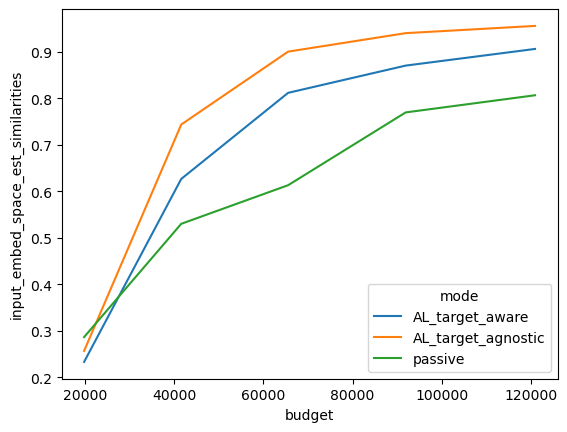

In [36]:
sns.lineplot(x="budget", y="input_embed_space_est_similarities", data=results[12434], hue="mode", markers=True, dashes=False)
# plt.yscale("log")

### Source sampling number vs Most-target-related source estimation acc
- similar as before

(30000.0, 130000.0)

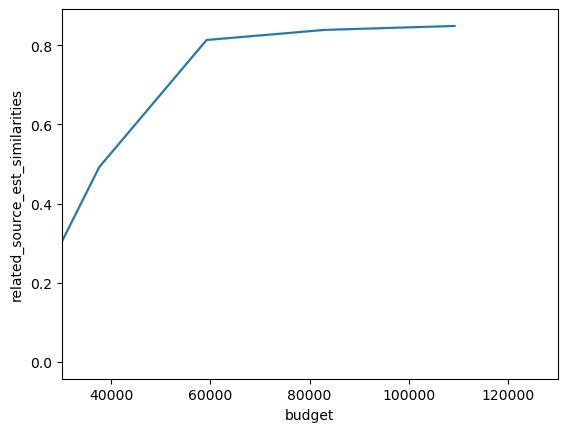

In [38]:
sns.lineplot(x="budget", y="related_source_est_similarities", data=results[500], markers=True, dashes=False)
# plt.yscale("log")
# plt.ylim([0.8, 1])
plt.xlim([30000, 130000])

(30000.0, 130000.0)

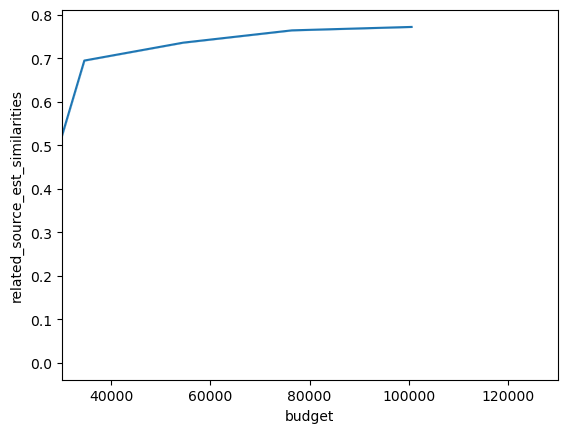

In [39]:
sns.lineplot(x="budget", y="related_source_est_similarities", data=results[43], markers=True, dashes=False)
# plt.yscale("log")
# plt.ylim([0.8, 1])
plt.xlim([30000, 130000])


(30000.0, 130000.0)

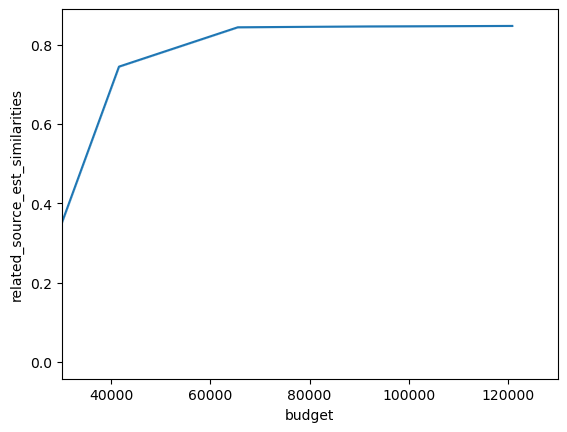

In [40]:
sns.lineplot(x="budget", y="related_source_est_similarities", data=results[12434], markers=True, dashes=False)
# plt.yscale("log")
# plt.ylim([0.8, 1])
plt.xlim([30000, 130000])